In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['haberman.csv']


In [4]:
# Read csv file
haberman = pd.read_csv('../input/haberman.csv', header=None)
# Print top 10 rows list
haberman.head(10)

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


**Observation(s):**
1. From above list, we cant get to know what values are these. <br>
2. Let add column names for better understanding of these dataset.
From the observation about this file from kaggle, here some attributes means <br>
>age -> person's age at that time of operation <br>
year -> year which operation has been performed <br>
nodes -> number of auxillary nodes detected <br>
status -> Survival status. So inside these status is either 1 or 2. It means: <br>
>>1 = the patient survived 5 years or longer <br>
2 = the patient died within 5 years <br>

In [6]:
haberman.columns = ['age','year','nodes','status']
haberman.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [7]:
# Number of points present in this dataset
haberman.shape

(306, 4)

In [8]:
print('There are {} rows (i.e. data points) and {} columns (i.e. features and label) in this dataset'.format(haberman.shape[0],haberman.shape[1]))

There are 306 rows (i.e. data points) and 4 columns (i.e. features and label) in this dataset


In [9]:
# Let see how many classes are there.
haberman.status.unique()

array([1, 2])

In [10]:
# Number of data points per class
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

**Observation(s):**
From the above, we observed that the data is imbalanced as there are 225 data points for a class (status=1) and <br>
81 for other class (status=2)

**Objective:** To find whether the patient, who had undergone surgery for breast cancer, survived longer than 5 years or not

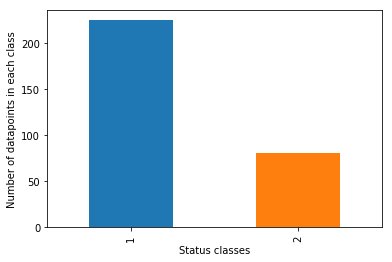

In [11]:
# To visualize in bargraph
# Import necessary libraries of plotting
import matplotlib.pyplot as plt

haberman['status'].value_counts().plot.bar()
plt.xlabel('Status classes')
plt.ylabel('Number of datapoints in each class')
plt.show()

# Univariant Analysis
It means we are analyzing using one feature only.
## 1-D Scatter plot
To plot the one dimension for every each features in the dataset.

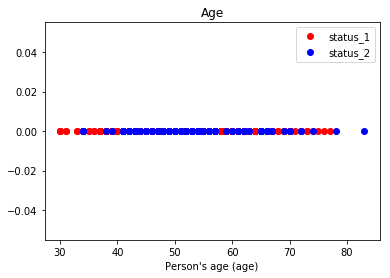

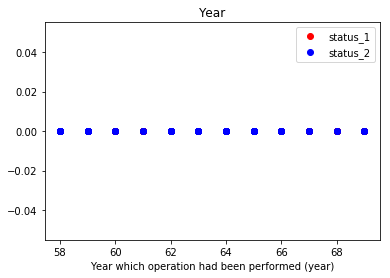

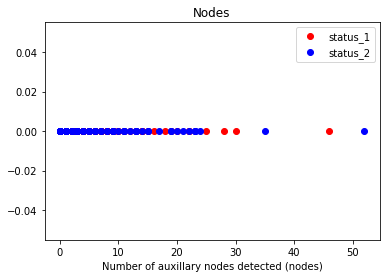

In [13]:
# Create separate data points for different classes.
# Since we have two classes. We create two variables.
haberman_1 = haberman.loc[haberman['status'] == 1]
haberman_2 = haberman.loc[haberman['status'] == 2]
# harberman_1 correspond to data points where status = 1. Similarly for haberman_2 correspond
# to data points where status = 2

plt.figure(1)
plt.plot(haberman_1['age'], np.zeros_like(haberman_1['age']),'ro', label='status_1')
plt.plot(haberman_2['age'], np.zeros_like(haberman_2['age']), 'bo', label='status_2')
plt.xlabel('Person\'s age (age)')
plt.title('Age')
plt.legend()

plt.figure(2)
plt.plot(haberman_1['year'], np.zeros_like(haberman_1['year']),'ro', label='status_1')
plt.plot(haberman_2['year'], np.zeros_like(haberman_2['year']), 'bo', label='status_2')
plt.xlabel('Year which operation had been performed (year)')
plt.title('Year')
plt.legend()

plt.figure(3)
plt.plot(haberman_1['nodes'], np.zeros_like(haberman_1['nodes']),'ro', label='status_1')
plt.plot(haberman_2['nodes'], np.zeros_like(haberman_2['nodes']), 'bo', label='status_2')
plt.xlabel('Number of auxillary nodes detected (nodes)')
plt.title('Nodes')
plt.legend()

plt.show()

**Observation(s):**
From the above: <br>
1. In age plot graph (Top fig), there is no linearly separable we can draw to apart them. <br>
2. In year plot graph (middle fig), we cant see the status 1 (or red dot color), so it might be overlapped or there are none.
So we cant say for sure. 
3. In nodes plot graph (last fig), there is no connection among them. <br><br>
So by overall result, by plotting 1-D scatter plot, we cant correlate each other or cant find any distinguish between them.
And since they overlapping each other, we cant say how many data points are there between intervals.

## Histograms and Probability Density Functions (PDF) using KDE
Let move to next steps: Histogram, which plot the graph between data points and counts of each class.<br>
PDF tells us what is the probability that a variable falls between intervals.<br> And KDE is estimator to PDF. KDE has a property that from graph, the area under the curved function is equal to 1.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


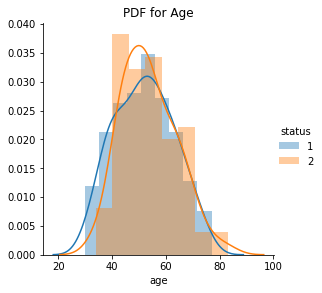

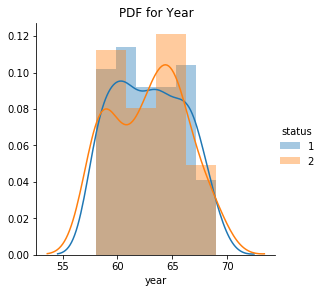

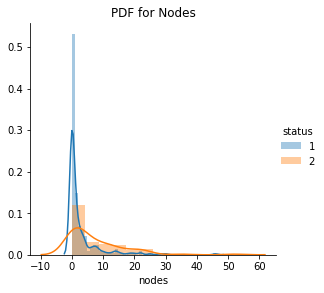

In [16]:
# Import neccessary library
import seaborn as sns

sns.FacetGrid(haberman, hue="status", size=4) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('PDF for Age')

sns.FacetGrid(haberman, hue="status", size=4) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('PDF for Year')

sns.FacetGrid(haberman, hue="status", size=4) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('PDF for Nodes')

plt.show();

## Cumulative Distribution Function (CDF)
This function will tell us what is the probability that the variable takes a value less than x (here x is on x-axis value)

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


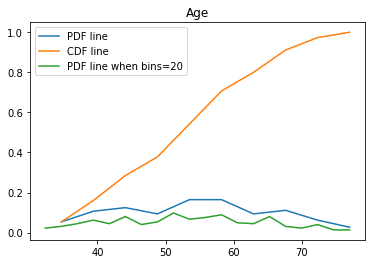

In [18]:
counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF line');
plt.plot(bin_edges[1:], cdf, label='CDF line')


counts, bin_edges = np.histogram(haberman_1['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf, label='PDF line when bins=20');
plt.title('Age')

plt.legend()
plt.show();

## CDF for Age attribute

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


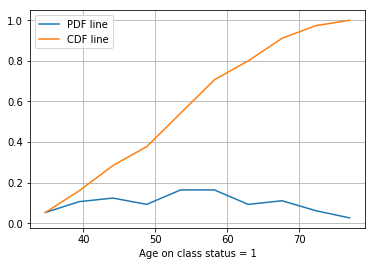

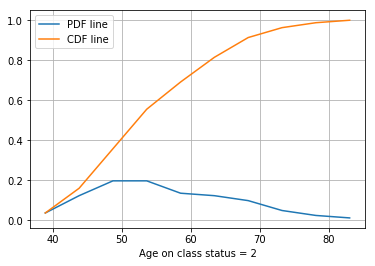

In [19]:
# Plot CDF of age

counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

# Compute CDF
cdf = np.cumsum(pdf)
plt.figure(1)
plt.plot(bin_edges[1:], pdf, label='PDF line')
plt.plot(bin_edges[1:], cdf, label='CDF line')
plt.xlabel('Age on class status = 1')
plt.grid()
plt.legend()

counts, bin_edges = np.histogram(haberman_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

# Compute CDF
cdf = np.cumsum(pdf)
plt.figure(2)
plt.plot(bin_edges[1:], pdf, label='PDF line')
plt.plot(bin_edges[1:], cdf, label='CDF line')
plt.xlabel('Age on class status = 2')
plt.grid()
plt.legend()



plt.show()

## CDF for Year attribute

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


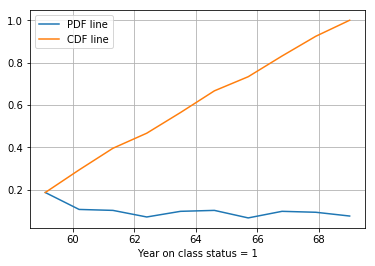

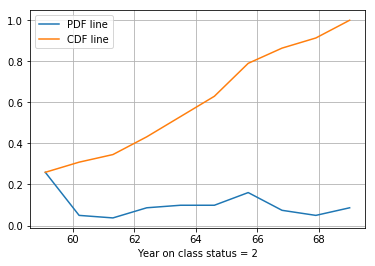

In [20]:
# Plot CDF of year

counts, bin_edges = np.histogram(haberman_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

# Compute CDF
cdf = np.cumsum(pdf)
plt.figure(1)
plt.plot(bin_edges[1:], pdf, label='PDF line')
plt.plot(bin_edges[1:], cdf, label='CDF line')
plt.xlabel('Year on class status = 1')
plt.grid()
plt.legend()

counts, bin_edges = np.histogram(haberman_2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

# Compute CDF
cdf = np.cumsum(pdf)
plt.figure(2)
plt.plot(bin_edges[1:], pdf, label='PDF line')
plt.plot(bin_edges[1:], cdf, label='CDF line')
plt.xlabel('Year on class status = 2')
plt.grid()
plt.legend()



plt.show()

## CDF for Nodes attribute

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


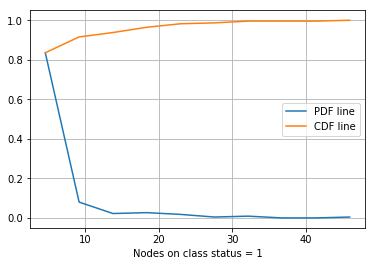

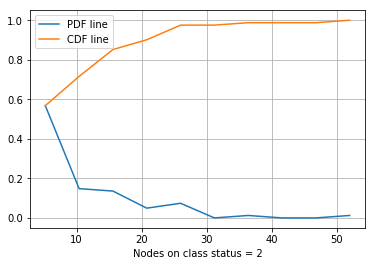

In [21]:
# Plot CDF of nodes

counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

# Compute CDF
cdf = np.cumsum(pdf)
plt.figure(1)
plt.plot(bin_edges[1:], pdf, label='PDF line')
plt.plot(bin_edges[1:], cdf, label='CDF line')
plt.xlabel('Nodes on class status = 1')
plt.grid()
plt.legend()

counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

# Compute CDF
cdf = np.cumsum(pdf)
plt.figure(2)
plt.plot(bin_edges[1:], pdf, label='PDF line')
plt.plot(bin_edges[1:], cdf, label='CDF line')
plt.xlabel('Nodes on class status = 2')
plt.grid()
plt.legend()



plt.show()

## Combining CDF for each attribute with different class

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


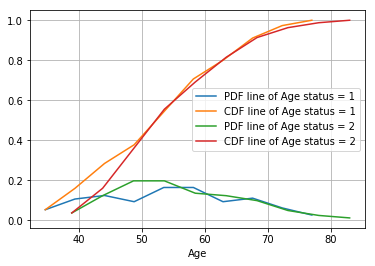

In [22]:
# Plots of CDF of age for different status classes.

counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF line of Age status = 1')
plt.plot(bin_edges[1:], cdf, label='CDF line of Age status = 1')

counts, bin_edges = np.histogram(haberman_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF line of Age status = 2')
plt.plot(bin_edges[1:], cdf, label='CDF line of Age status = 2')

plt.legend()
plt.xlabel('Age')
plt.grid()
plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


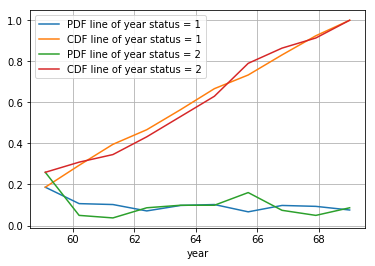

In [23]:
# Plots of CDF of year for different status classes.

counts, bin_edges = np.histogram(haberman_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF line of year status = 1')
plt.plot(bin_edges[1:], cdf, label='CDF line of year status = 1')

counts, bin_edges = np.histogram(haberman_2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF line of year status = 2')
plt.plot(bin_edges[1:], cdf, label='CDF line of year status = 2')

plt.legend()
plt.xlabel('year')
plt.grid()
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


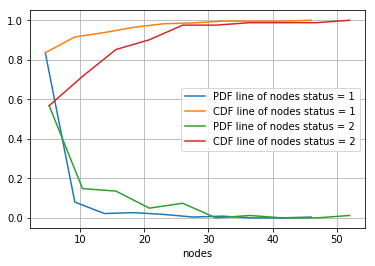

In [24]:
# Plots of CDF of nodes for different status classes.

counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF line of nodes status = 1')
plt.plot(bin_edges[1:], cdf, label='CDF line of nodes status = 1')

counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF line of nodes status = 2')
plt.plot(bin_edges[1:], cdf, label='CDF line of nodes status = 2')

plt.legend()
plt.xlabel('nodes')
plt.grid()
plt.show();

**Observation(s):**
From the above by using PDF and CDF, we still cant find any relationship or
cant create condition criteria (like if ... else...) to distinguish/classify them.

## Boxplot: A Five Summary Of Data
It is visualization to represent 5 summary values: minimum, Q1 (25 percetile), Q2 (Median or 50 percentile), Q3 (75 percentile), maximum. <br>
IQR (Interquatile range) is the range between two quartiles = Q3-Q1

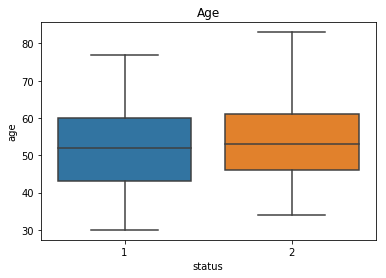

In [25]:
sns.boxplot(x='status', y='age', data=haberman)
plt.title('Age')
plt.show()

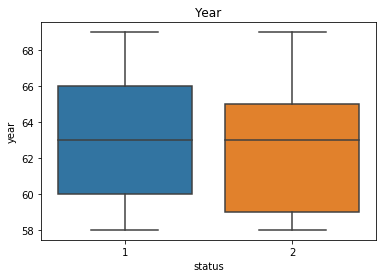

In [26]:
sns.boxplot(x='status', y='year', data=haberman)
plt.title('Year')
plt.show()

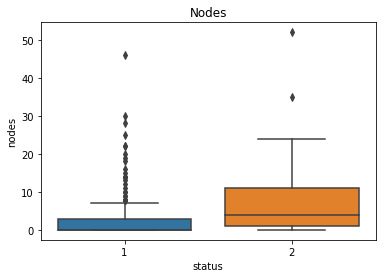

In [27]:
sns.boxplot(x='status', y='nodes', data=haberman)
plt.title('Nodes')
plt.show()

## Violin Plot: Combination of Boxplot and PDF

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


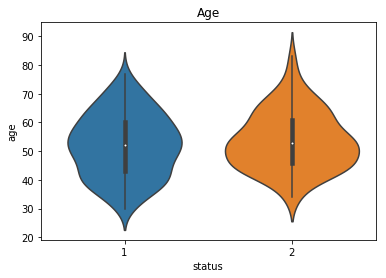

In [28]:
sns.violinplot(x='status', y='age', data=haberman)
plt.title('Age')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


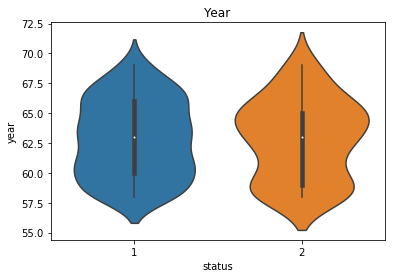

In [29]:
sns.violinplot(x='status', y='year', data=haberman)
plt.title('Year')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


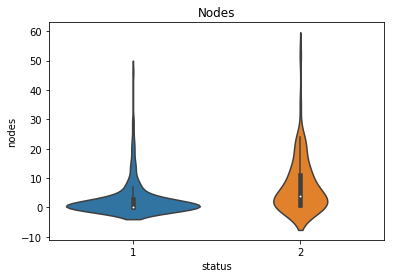

In [30]:
sns.violinplot(x='status', y='nodes', data=haberman)
plt.title('Nodes')
plt.show()

**Observation(s)**:
1. For patient's age lies 55 to 60 years old had more higher chances to survived longer than 5 years (Top fig)
2. For patients who had operated after 1967 had more slightly chances to survived longer than 5 years and before 1967 had less chances to survived (Middle fig)
3. For patients who had got 0-5 number of auxillary nodes detected had more chances to survived longer than 5 years (Last fig)

# Bi-variate analysis
It means we are analysing with two features

## 2-D Scatter plot
To plot between two features

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


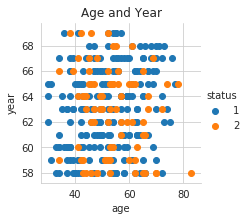

In [31]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=3) \
   .map(plt.scatter, "age", "year") \
   .add_legend()

plt.title('Age and Year')
plt.show()

## Pair Plot
To plot combination of two features.<br>
Formula = nC2, where n is number of features present in dataset

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


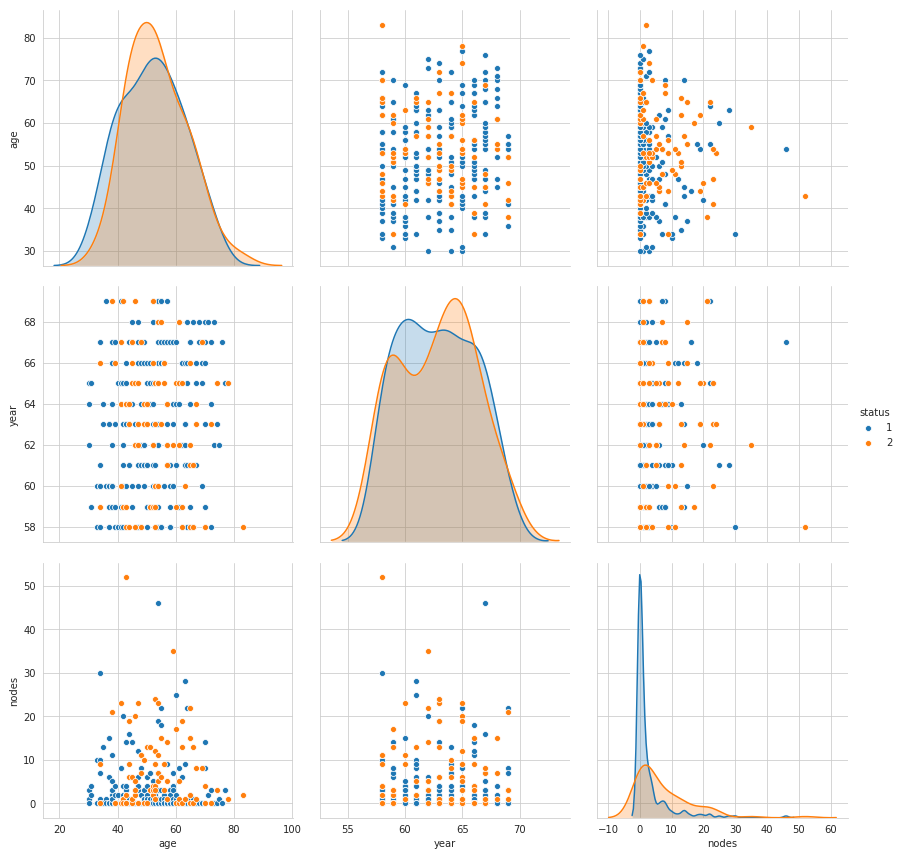

In [32]:
sns.set_style("whitegrid")
sns.pairplot(haberman, hue='status', size=4, vars=['age','year','nodes'])
plt.show()

**Observation(s)**:
1. From age-year pairplot, there is not much informative about this. But we can say one thing that all patients who operated after 1966 year had survived mostly.
2. From age-nodes pairplot, there's not much things where we cant relate them.
3. From year-nodes pairplot, we can certainly see the very much more relative than the other plots. It cant be linear separable but we can create some condition criteria for that sort of portion.
>For example We can say, all patients, who operated from 1960 to 1963 and number of auxillary nodes detected below 8, had higher chances survived longer than 5 years. <br>
> Other portion, we can say that all patients, who operated from 1965 and 1966 and number of auxillary nodes detected below 10, had lower chances to survived.